This is also one of the best method to Deal with Missing Categorical value


In this method we are going to replace NA categorical values with 'MISSING'--> It is weel suited when the number of Missing data is HIGH 

In [1]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

In [2]:
data = pd.read_csv('/Users/nandrajog/Downloads/House-price.csv',low_memory=False)

In [3]:
croped_data = data[['BsmtQual','FireplaceQu','GarageType','SalePrice']]

In [4]:
X_train,X_test,Y_train,Y_test = train_test_split(croped_data[['BsmtQual','FireplaceQu','GarageType']],
                                                 croped_data.SalePrice,train_size = 0.9,random_state=0)



In [5]:
def Impute_na(df_train,df_test,col):
#     most_frequent = df_train[col].value_counts().index[0]
#     df_train[col+'_frequent'] = df_train[col].fillna(most_frequent)
#     df_test[col+'_frequent'] = df_test[col].fillna(most_frequent)
    
#     random = np.random.choice(df_train[col].dropna())
#     print(random)
#     df_train[col+'_random'] = df_train[col].fillna(random)
#     df_test[col+'_random'] = df_test[col].fillna(random)
    
    df_train[col+'_NA'] = np.where(df_train[col].isnull(),'Missing',df_train[col])
    df_test[col+'_NA'] = np.where(df_test[col].isnull(),'Missing',df_test[col])

In [6]:
for col in ['BsmtQual','FireplaceQu','GarageType']:
    Impute_na(X_train,X_test,col)

In [7]:
X_train

,BsmtQual,FireplaceQu,GarageType,BsmtQual_NA,FireplaceQu_NA,GarageType_NA
930,Gd,NaN,Attchd,Gd,Missing,Attchd
656,TA,NaN,Attchd,TA,Missing,Attchd
45,Ex,Gd,Attchd,Ex,Gd,Attchd
1348,Gd,Fa,Attchd,Gd,Fa,Attchd
55,TA,Gd,Attchd,TA,Gd,Attchd
...,...,...,...,...,...,...
763,Gd,Gd,Attchd,Gd,Gd,Attchd
835,Gd,NaN,Attchd,Gd,Missing,Attchd
1216,NaN,NaN,Attchd,Missing,Missing,Attchd
559,Gd,TA,Attchd,Gd,TA,Attchd


In [8]:
X_train.columns

Index(['BsmtQual', 'FireplaceQu', 'GarageType', 'BsmtQual_NA',
       'FireplaceQu_NA', 'GarageType_NA'],
      dtype='object')

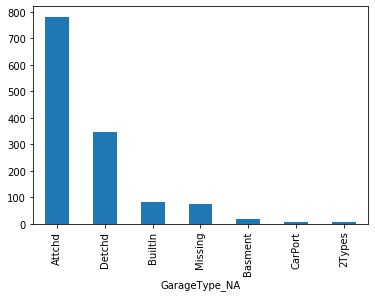

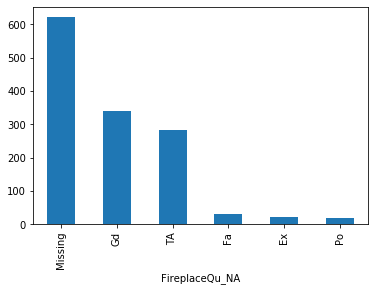

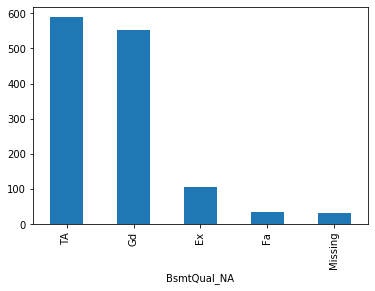

In [9]:
for col in ['GarageType_NA','FireplaceQu_NA','BsmtQual_NA']:
    X_train.groupby([col])[col].count().sort_values(ascending=False).plot.bar()
    plt.show()

In [10]:
for col in ['GarageType_NA','FireplaceQu_NA','BsmtQual_NA']:
    labels_dict = {k:i for i,k in enumerate(X_train[col].unique())}
    X_train.loc[:,col] = X_train.loc[:,col].map(labels_dict)
    X_test.loc[:,col] = X_test.loc[:,col].map(labels_dict)
    

In [11]:
X_train

,BsmtQual,FireplaceQu,GarageType,BsmtQual_NA,FireplaceQu_NA,GarageType_NA
930,Gd,NaN,Attchd,0,0,0
656,TA,NaN,Attchd,1,0,0
45,Ex,Gd,Attchd,2,1,0
1348,Gd,Fa,Attchd,0,2,0
55,TA,Gd,Attchd,1,1,0
...,...,...,...,...,...,...
763,Gd,Gd,Attchd,0,1,0
835,Gd,NaN,Attchd,0,0,0
1216,NaN,NaN,Attchd,4,0,0
559,Gd,TA,Attchd,0,3,0


In [12]:
clf = LinearRegression()
clf.fit(X_train[['BsmtQual_NA','FireplaceQu_NA',
                'GarageType_NA']],Y_train)
predict_train = clf.predict(X_train[['BsmtQual_NA','FireplaceQu_NA',
                'GarageType_NA']])
print("Train Set")
print("MSE {}".format(mean_squared_error(predict_train,Y_train)))
print("Test Set")
predict_test = clf.predict(X_test[['BsmtQual_NA','FireplaceQu_NA',
                'GarageType_NA']])
print("MSE {}".format(mean_squared_error(predict_test,Y_test)))

Train Set
MSE 5451893027.016162
Test Set
MSE 5752540482.188776


GOOD! this method also work very well